# Setting up enviornment 
# This is about telecommunications company making record for customers data  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # to visualize dataset most efficient way as compared to any other  plot

In [2]:
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory data analysis

In [6]:
data.shape   #Rows and columns 

(4250, 20)

<AxesSubplot:>

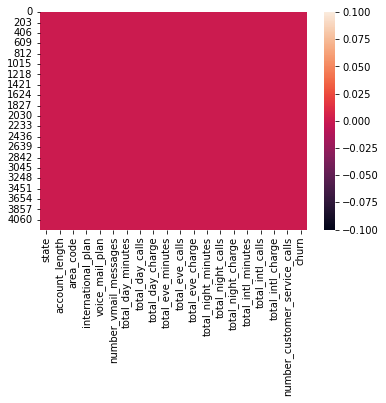

In [9]:
sns.heatmap(data.isnull()) #heatmap plot color chart 

In [8]:
data.isnull().sum().any() #checking if any data has null value or not 

False

In [10]:
data.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [11]:
data.state.unique() #to get unique values of Series object ,using hashtable   finding how many different states/ number of unique states

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

<AxesSubplot:>

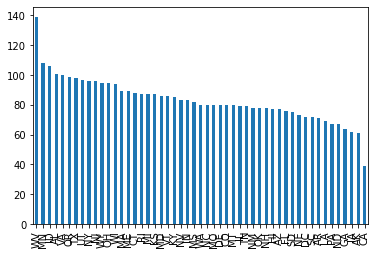

In [11]:
data.state.value_counts().plot(kind='bar') #counts repeated values of state in bar chart # data.state.value_counts()-> counting total repeated states 

In [12]:
data.account_length.nunique() #counts total distinct account_length values

215

In [13]:
data.area_code.nunique()

3

# Since there are only 3 categrical values in this column, turning them in to int could lead to variation in result, so we will use them as categorical values only.   

<AxesSubplot:ylabel='international_plan'>

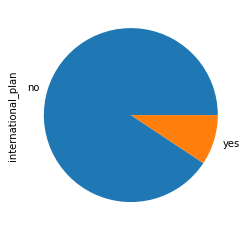

In [14]:
data.international_plan.value_counts().plot(kind='pie') # how many customers taking international plan or not 

<AxesSubplot:ylabel='voice_mail_plan'>

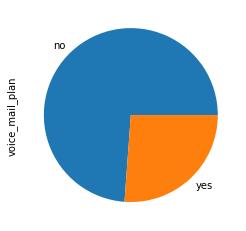

In [19]:
#plotting
data.voice_mail_plan.value_counts().plot(kind ='pie') # we have voice_mail_plan data in our given dataset, and plotting in the form of  pieplot 

<AxesSubplot:xlabel='voice_mail_plan', ylabel='number_vmail_messages'>

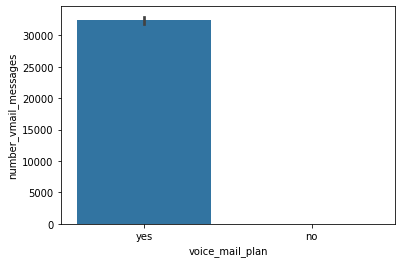

In [15]:
sns.barplot(x=data.voice_mail_plan, y=data.number_vmail_messages, estimator=sum)  #   sum of voice mail plans, and voice mail messages
# barplot , taking x axis and y axis, plotting sum of vmail_messages in y axis

<AxesSubplot:>

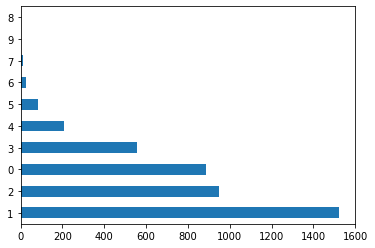

In [21]:
data.number_customer_service_calls.value_counts().plot(kind='barh')
#here we are counting values of customer service call and plotting it in the form of barh plot

In [16]:
churn_y = data.loc[data.churn == 'yes', 'churn'].count()
churn_n = data.loc[data.churn == 'no', 'churn'].count()
churn_total =churn_n+churn_y
print('The total customers are '+ str(churn_total))
print('Total Churned customers are '+ str(churn_y) +' which is '+ str(round(100*churn_y/churn_total,0)) +'%' )
# percentage of churn_y chruened customer
print('Total non-Churned customers are '+ str(churn_n) +' which is '+ str(round(100*churn_n/churn_total,0)) +'%' )

#percentage of non-churned customer of churn_n

The total customers are 4250
Total Churned customers are 598 which is 14.0%
Total non-Churned customers are 3652 which is 86.0%


# plot statewise customers 

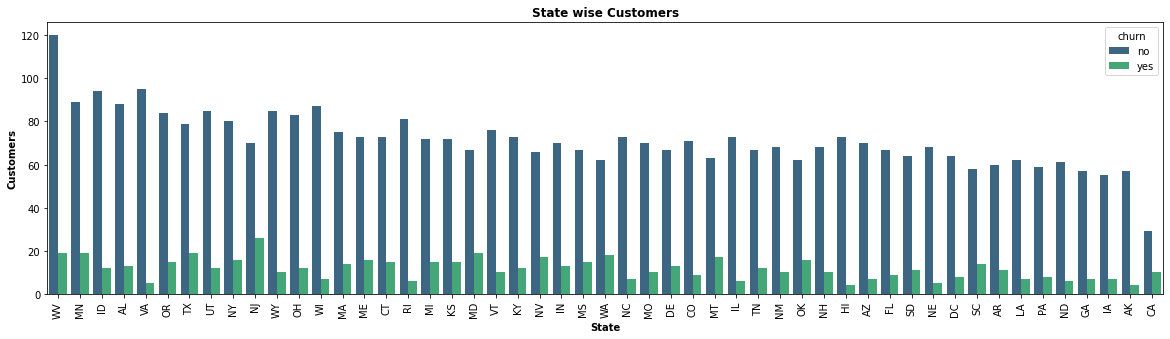

In [17]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(data=data,x='state' , order=data['state'].value_counts().index, palette='viridis' ,hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('State wise Customers', fontsize=12, fontweight='bold')
plt.show()             
              


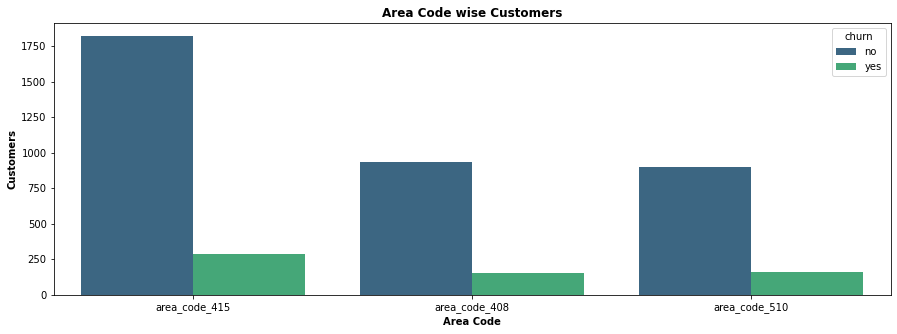

In [18]:
fig2, ax=plt.subplots(figsize=(15,5))
sns.countplot(data = data, x='area_code', order=data['area_code'].value_counts().index, palette='viridis', hue='churn')
plt.xlabel('Area Code', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Area Code wise Customers', fontsize=12, fontweight='bold')
plt.show()

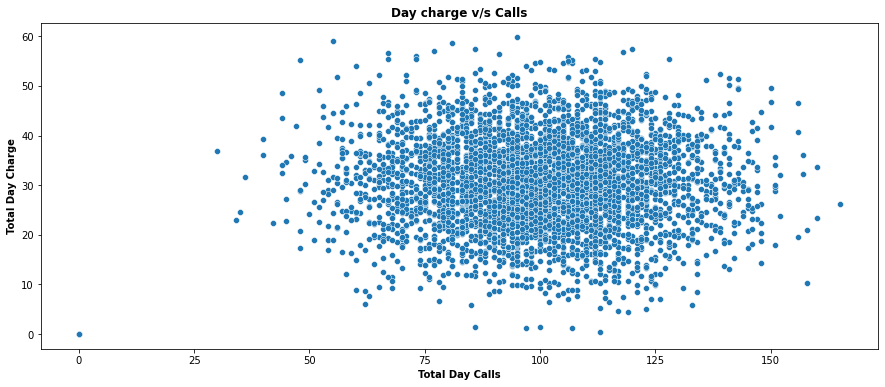

In [19]:
fig3, ax=plt.subplots(figsize=(15,6)) # breadth , height
sns. scatterplot(data= data, x='total_day_calls' ,y='total_day_charge',palette='viridis')
plt.xlabel('Total Day Calls' ,fontsize=10,fontweight='bold')
plt.ylabel('Total Day Charge' ,fontsize=10,fontweight='bold')
plt.title('Day charge v/s Calls',fontsize=12, fontweight='bold')
plt.show()

In [20]:
data[data.total_day_calls==0] #customer who did not call in  a day


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1138,SD,98,area_code_415,no,no,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,yes
1183,VT,101,area_code_510,no,no,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,no


In [21]:
data2=data.drop([1138,1183]) 
data2[data2.total_day_calls==0] 
# again checking if any customer left with no calls in a day 

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [22]:
data2.describe() 
# describe function is a statistical function, which return all statistical values of data ,
#for example finding mean, std deviation

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,100.236582,7.635358,180.344468,99.954331,30.659110,200.185358,100.165019,17.015984,200.543220,99.843456,9.024581,10.257604,4.427260,2.770068,1.558616
std,39.707730,13.442026,53.883218,19.736713,9.160139,50.257338,19.905920,4.271877,50.360435,20.096992,2.266232,2.759843,2.463079,0.745134,1.311179
min,1.000000,0.000000,2.600000,30.000000,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.475000,87.000000,24.395000,165.975000,87.000000,14.107500,167.275000,86.000000,7.527500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.500000,100.000000,30.690000,200.700000,100.000000,17.060000,200.500000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.225000,113.000000,36.755000,233.800000,114.000000,19.870000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
data3=data2.groupby(['area_code','churn']).agg({'number_customer_service_calls': 'sum','state':'count'})

# we are making four cases area code wise, whether churn is yes or no , counting number of 
# customer service calls , and Total Count Customers. and finding average calls. 
data3['Average Calls'] = data3['number_customer_service_calls']/data3['state']
data3.rename(columns={'state':'Count of Customers','number_customer_service_calls':'Number of Customer Service Calls'}, 
                inplace=True)
data3

#inplace =True means , modifyting column of given dataset ,
#inplace=False means , reading same column name from given datatset 


Number of Customer Service Calls  Count of Customers  \
area_code     churn                                                         
area_code_408 no                                 1354                 934   
              yes                                 353                 152   
area_code_415 no                                 2568                1821   
              yes                                 643                 286   
area_code_510 no                                 1342                 896   
              yes                                 361                 159   

                     Average Calls  
area_code     churn                 
area_code_408 no          1.449679  
              yes         2.322368  
area_code_415 no          1.410214  
              yes         2.248252  
area_code_510 no          1.497768  
              yes         2.270440

In [24]:
data4 = data2.groupby(['voice_mail_plan','churn']).agg({'state': 'count'}).reset_index()
data4
# we are making four cases 


,voice_mail_plan,churn,state
0,no,no,2621
1,no,yes,515
2,yes,no,1030
3,yes,yes,82


# **Feature Engineering** 

In [25]:
#Create columns with rate of calls, so call charge columns could be dropped as they are corelated.
data2['day_rate']=data2['total_day_charge']/data2['total_day_minutes']
data2['eve_rate'] =data2['total_eve_charge']/data2['total_eve_minutes']
data2['night_rate'] = data2['total_night_charge']/data2['total_night_minutes']
data2['intl_rate'] = data2['total_intl_charge']/data2['total_intl_minutes']

In [26]:
data2.drop({'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'},axis=1,inplace= True)


In [31]:
data2.dropna(inplace=True)

In [49]:
X0=data2.drop('churn', axis=1)
y=data2.churn

In [50]:
X0.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'day_rate',
       'eve_rate', 'night_rate', 'intl_rate'],
      dtype='object')

In [34]:
X0.drop({'voice_mail_plan'},axis=1,inplace=True)

In [41]:
X0.isnull().sum().any()

False

In [36]:
X0.isnull().sum().any()

False

<AxesSubplot:>

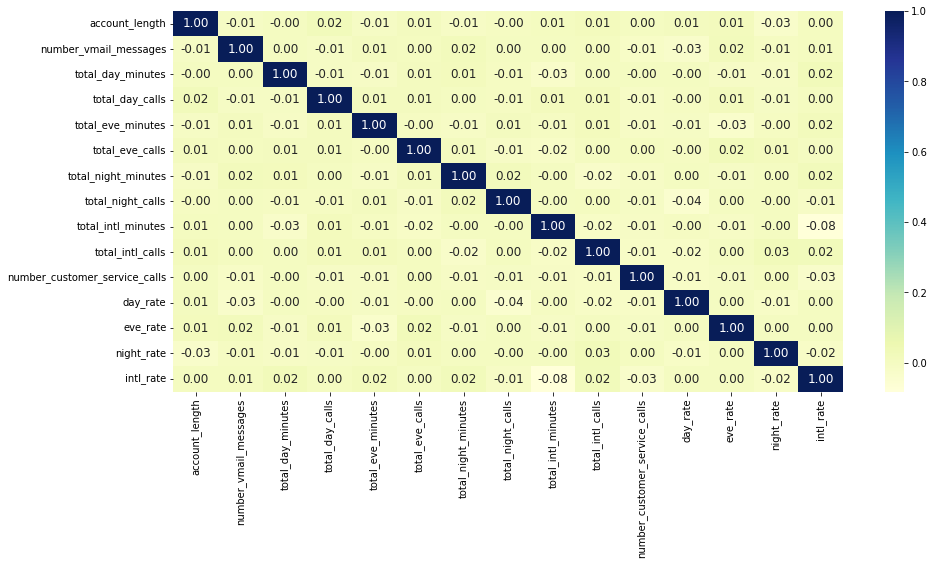

In [42]:
corr = X0.corr()
fig4, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap="YlGnBu",annot_kws={'size': 12},fmt=".2f")

In [44]:
X0.dtypes


state                             object
account_length                     int64
area_code                         object
international_plan                object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_eve_minutes                float64
total_eve_calls                    int64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
day_rate                         float64
eve_rate                         float64
night_rate                       float64
intl_rate                        float64
dtype: object

In [45]:
X1= pd.get_dummies(X0, drop_first = True)
X1.shape


(4224, 68)

# Model Designing 

In [52]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.80,test_size=0.20,random_state=1)

In [53]:
print(X_train.isnull().sum().any())
print(X_valid.isnull().sum().any())
print(y_train.isnull().sum().any())
print(y_valid.isnull().sum().any())

False
False
False
False


In [54]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
X_train.head(3)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes
1170,36,0,202.4,115,230.7,115,202.0,127,10.2,2,...,0,0,0,0,0,0,0,1,0,0
2689,41,0,223.8,67,244.8,74,223.8,156,12.3,5,...,0,0,0,0,0,0,1,0,1,0
2578,95,0,190.2,119,157.1,70,181.5,120,14.0,6,...,0,0,0,0,0,0,0,0,0,0


Accuracy is:  92  %


<AxesSubplot:>

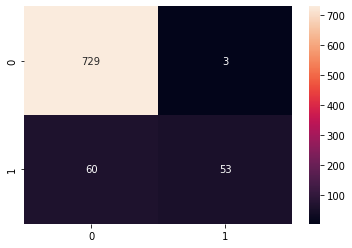

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_valid,clf_rf.predict(X_valid))
print('Accuracy is: ',int(ac*100)," %")
cm = confusion_matrix(y_valid,clf_rf.predict(X_valid))
sns.heatmap(cm,annot=True,fmt="d")

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_valid, y_valid)
a = select_feature.scores_
b = X_train.columns
df = pd.DataFrame(list(zip(b, a)),
               columns =['Column', 'Score'])
df.dtypes

Column     object
Score     float64
dtype: object

In [58]:
df['Score'] = df['Score'].replace(np.nan, 0)
df['Score'] = df['Score'].astype(int)
df.sort_values(by='Score',ascending=False)

,Column,Score
2,total_day_minutes,398
1,number_vmail_messages,313
4,total_eve_minutes,78
67,international_plan_yes,60
10,number_customer_service_calls,52
...,...,...
22,state_DE,0
21,state_DC,0
19,state_CO,0
47,state_NV,0


In [59]:
y_pred=clf_rf.predict(X1)


# Generate Submission

In [61]:
test0=pd.read_csv('test.csv')
test0.head()


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [62]:
test=test0.copy()


In [63]:
test['day_rate'] = test['total_day_charge']/test['total_day_minutes']
test['eve_rate'] = test['total_eve_charge']/test['total_eve_minutes']
test['night_rate'] = test['total_night_charge']/test['total_night_minutes']
test['intl_rate'] = test['total_intl_charge']/test['total_intl_minutes']

In [64]:
test.drop({'id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','voice_mail_plan'},axis=1,inplace= True)
test1= pd.get_dummies(test, drop_first = True)


In [65]:
a = (test1.isnull().sum())
print(a[a>0])

intl_rate    2
dtype: int64


In [66]:
test1.fillna(0,inplace=True)


In [67]:
results =clf_rf.predict(test1)


In [68]:
submission = pd.DataFrame({
        "id": test0["id"],
        "churn": results
    })

submission.to_csv('submission.csv', index=False)

In [69]:
submission.shape


(750, 2)